# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [1]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
# Load data using python JSON module
with open('yearinfo.json', 'r') as json_file:
  yearinfo = json.load(json_file)
print(yearinfo)


{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [4]:
#write your code here
#creating list
data_list = []
for key, values in yearinfo.items():
  for i in values:
    data_list.append(list(i.values()) + [key])



In [5]:
#data_list created
type(data_list)

list

In [6]:
#Converting data_list to dataframe
df = pd.DataFrame(data_list)
df.head()

0                                            1  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                       2  3                   4  \
0                       [Tik Tok (song)]  1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]  2      "Need You Now"   
2                     [Hey, Soul Sister]  3  "Hey, Soul Sister"   
3                     [California Gurls]  4  "California Gurls"   
4                     [OMG (Usher song)]  5               "OMG"   

                                           5     6  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [7]:
#Renaming all column name 
df.columns = ['band_singer','song','song_url','ranking','titletext','url','year']
df.head()


band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

## Cleaning Data Frame

In [8]:
df.isnull().sum()

band_singer    0
song           0
song_url       0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [9]:
df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [10]:
#Converting year into int
df.year = df.year.astype('int')

In [191]:
df.dtypes

band_singer    object
song           object
song_url       object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [11]:
#Sorting band_singer in list
lst = []
for values in df['band_singer']:
  lst.append(values)
print(lst)

[['Kesha'], ['Lady Antebellum'], ['Train (band)'], ['Katy Perry', 'Snoop Dogg'], ['Usher (musician)', 'Will.i.am'], ['B.o.B', 'Hayley Williams'], ['Eminem', 'Rihanna'], ['Lady Gaga'], ['Taio Cruz'], ['Taio Cruz', 'Ludacris'], ['B.o.B', 'Bruno Mars'], ['Enrique Iglesias', 'Pitbull (rapper)'], ['Young Money', 'Lloyd (singer)'], ['Jason Derulo'], ['Rihanna'], ['Lady Gaga', 'Beyoncé'], ['Katy Perry'], ['Bruno Mars'], ['Mike Posner'], ['The Black Eyed Peas'], ['Jay-Z', 'Alicia Keys'], ['Usher (musician)', 'Pitbull (rapper)'], ['Travie McCoy', 'Bruno Mars'], ['Eminem'], ['Iyaz'], ['David Guetta', 'Akon'], ['The Script'], ['Kesha'], ['The Black Eyed Peas'], ['Owl City'], ['Trey Songz', 'Fabolous'], ['Drake (rapper)'], ['Lady Gaga'], ['Jason Derulo'], ['Nelly'], ['Ludacris'], ['Far East Movement', 'The Cataracs', 'Dev (singer)'], ['Timbaland', 'Justin Timberlake'], ['Michael Bublé'], ['Flo Rida', 'David Guetta'], ['Jay Sean', 'Lil Wayne'], ['La Roux'], ['Jason Derulo'], ['Justin Bieber', 'Luda

In [12]:
# Flatten the nested list to single list
newlst = [item for elem in lst for item in elem]
newlst[:2] # Showing first two item from single list

['Kesha', 'Lady Antebellum']

In [13]:
# Convert list to dataframe
singer_data_frame = pd.DataFrame(newlst)
singer_data_frame.columns = ['band_singer']
singer_data_frame.head(5)

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

In [15]:
# Replacing old data frame column with new data frame column
df['band_singer'] = singer_data_frame['band_singer']
df.head()

band_singer                                         song  \
0            Kesha                       [/wiki/Tik_Tok_(song)]   
1  Lady Antebellum  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2     Train (band)                     [/wiki/Hey,_Soul_Sister]   
3       Katy Perry                     [/wiki/California_Gurls]   
4       Snoop Dogg                     [/wiki/OMG_(Usher_song)]   

                                song_url  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

C:\Users\KCCC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


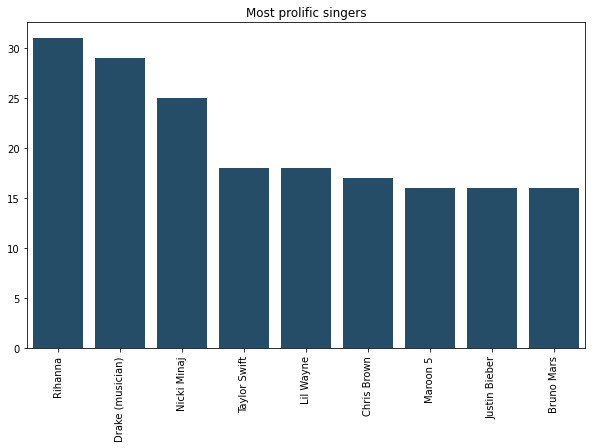

In [16]:
#Write your program and plot bar graph
quality_counts = df.band_singer.value_counts() 
quality_bands = quality_counts[quality_counts.values>15] #Singers on this chart should have appeared at-least more than 15 times

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(quality_bands.index, quality_bands.values, color = '#1B4F72')
plt.xticks(rotation=90)
plt.title("Most prolific singers");


In [204]:
#Detrermining the most apperance at-least more than 15 times.
best_singer = df['band_singer'].value_counts()>15
best_singer.head(15)

Rihanna              True
Drake (musician)     True
Nicki Minaj          True
Taylor Swift         True
Lil Wayne            True
Chris Brown          True
Maroon 5             True
Justin Bieber        True
Bruno Mars           True
Katy Perry          False
Usher (musician)    False
Pitbull (rapper)    False
Kesha               False
Adele               False
Calvin Harris       False
Name: band_singer, dtype: bool

**Question: Who is the most profilic singer?**

---




From the graph Rihanna is most profilic singer since she appeared at-least more than 15 times.
She appeared 31 times.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

C:\Users\KCCC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


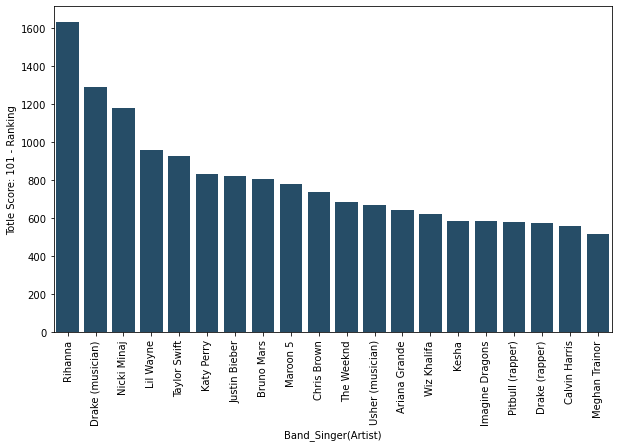

In [17]:
#write your code here
df['totle_score'] = 101 - df['ranking']

new_ranking = df.groupby('band_singer').totle_score.sum().sort_values(ascending = False)
top_20 = new_ranking.head(20)

f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(top_20.index, top_20.values, color = '#1B4F72')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer(Artist)')
plt.ylabel('Totle Score: 101 - Ranking');


**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

With the change in the metric the singers at the top shifted place since the total score was calculated 101 - ranking, whereby there is a change. And some of the artist appear more than twise which also lead to add more score.
Example: 
Lil Wayne and Taylor Swift both appear 18 times, whereby the ranking of some song of Lil Wayne is much more higher than Taylor Swift which give Lil Wayne extra score compared to Taylor Swift.    

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [18]:
# Total groups
len(df.groupby('year'))

12

In [20]:
# Framing new dataframe from df dataframe
new_data = df[['band_singer','ranking','year']]
# Grouping by year
year = new_data.groupby('year')
# Selecting particular group
year = year.get_group(2019)
# Finding highest frequency over particular group
highest_frequency = year['band_singer'].value_counts().sort_values(ascending = False)
top_10_2019 = highest_frequency.head(10)
top_10_2019

Drake (musician)    6
The Weeknd          5
Shawn Mendes        3
DJ Snake            3
Selena Gomez        3
Ariana Grande       3
Meghan Trainor      3
Justin Bieber       3
MØ                  2
Future (rapper)     2
Name: band_singer, dtype: int64

In [21]:
# Converting series to DataFrame
year2019 = pd.DataFrame(top_10_2019)
year2019

band_singer
Drake (musician)            6
The Weeknd                  5
Shawn Mendes                3
DJ Snake                    3
Selena Gomez                3
Ariana Grande               3
Meghan Trainor              3
Justin Bieber               3
MØ                          2
Future (rapper)             2

C:\Users\KCCC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


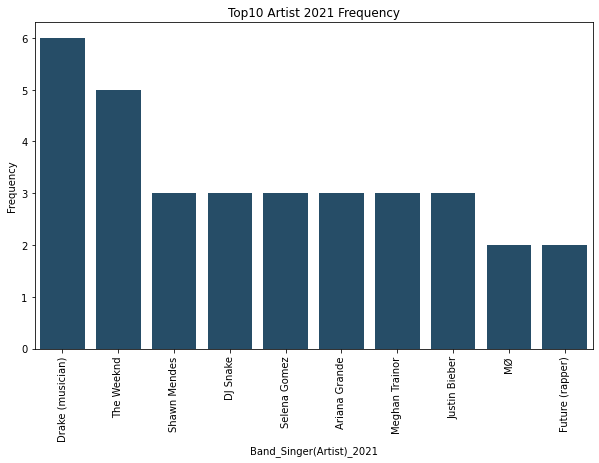

In [22]:
#Plotting Graph 

f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(top_10_2019.index, top_10_2019.values, color = '#1B4F72')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer(Artist)_2021')
plt.ylabel('Frequency')
plt.title("Top10 Artist 2021 Frequency");


## SUBMISSION DATE: 2nd April 2022 